<a href="https://colab.research.google.com/github/eduardonsm/ImersaoDados/blob/main/Aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados['SG_UF_RESIDENCIA']

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [ ]:
dados[['SG_UF_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA']]

,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
0,PA,Redenção
1,PA,Marabá
2,PA,Belém
3,PA,São Félix do Xingu
4,PA,Ananindeua
...,...,...
127375,MG,Montalvânia
127376,BA,Barra da Estiva
127377,BA,Salvador
127378,BA,Simões Filho


In [ ]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [ ]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [ ]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

**Desafio 01 - Porcentagem de inscritos de acordo com a idade**

In [ ]:
dados["NU_IDADE"].value_counts().sort_index() * 100 / dados['NU_IDADE'].count()

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

**Desafio 02 - descobrir em quais estados estão as pessoas com 13 anos**

In [ ]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

In [ ]:
dados[['SG_UF_RESIDENCIA',  "NU_IDADE"]].value_counts()

SG_UF_RESIDENCIA  NU_IDADE
SP                17          5594
                  18          3592
MG                18          2370
                  17          2087
SP                19          2072
                              ... 
MS                60             1
                  59             1
                  14             1
MA                66             1
AC                14             1
Length: 1333, dtype: int64

Text(0.5, 1.0, 'Quantidade de inscritos por idade')

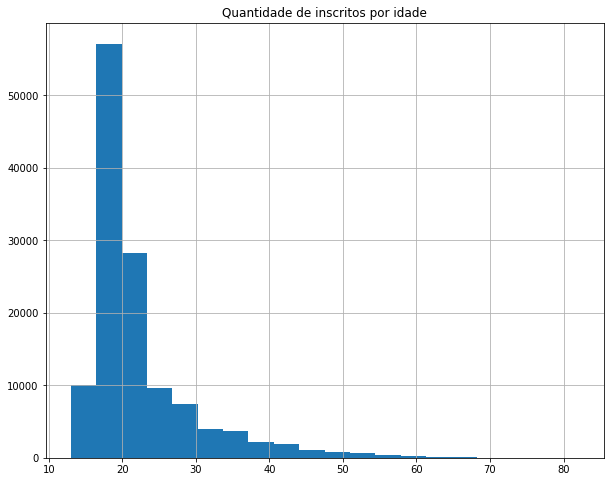

In [ ]:
dados['NU_IDADE'].hist(bins = 20, figsize = (10,8)).set_title("Quantidade de inscritos por idade")

In [ ]:
idade = len(dados["NU_IDADE"].unique())
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64


**Desafio 04 - Plotar os Histogramas das idades dos do treineiro e não treineiros**

Text(0.5, 0, 'Idade')

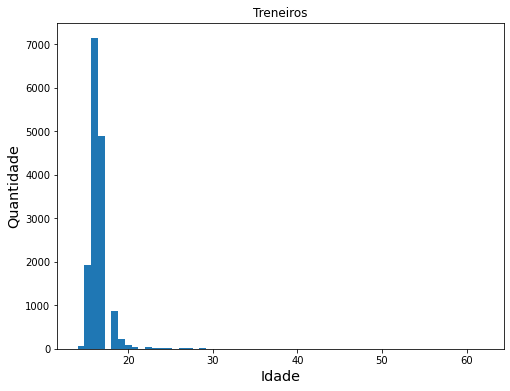

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].plot(kind ='hist', title = "Treneiros", bins=60)
plt.ylabel("Quantidade", size='x-large')
plt.xlabel("Idade", size='x-large')

Text(0.5, 0, 'Idade')

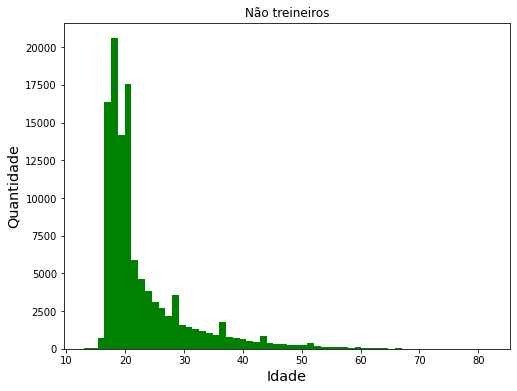

In [ ]:
plt.figure(figsize=(8,6))
dados.query("IN_TREINEIRO != 1")["NU_IDADE"].plot(kind ='hist', title = "Não treineiros", bins=60, color = "green")
plt.ylabel("Quantidade", size='x-large')
plt.xlabel("Idade", size='x-large')

In [ ]:
dados["NU_NOTA_REDACAO"].mean() #média

571.5700253970197

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d11ea87f0>,
      dtype=object)

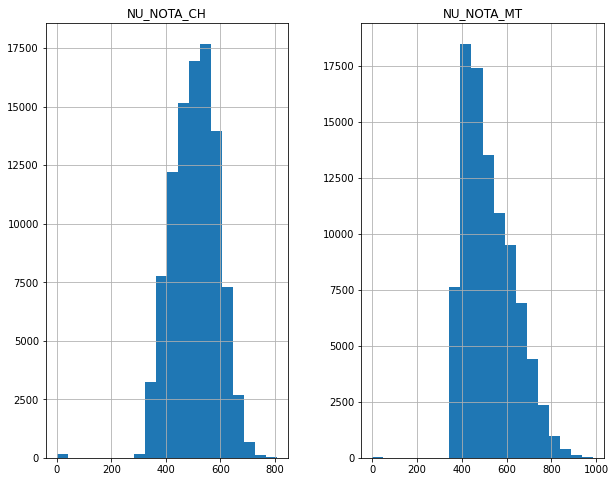

In [ ]:
dados[["NU_NOTA_CH","NU_NOTA_MT"]].hist(bins = 20, figsize = (10,8)) #ciencias humanas e matematica

In [ ]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

**Desafio 05 - Comparar as notas de inglês e espanhol**

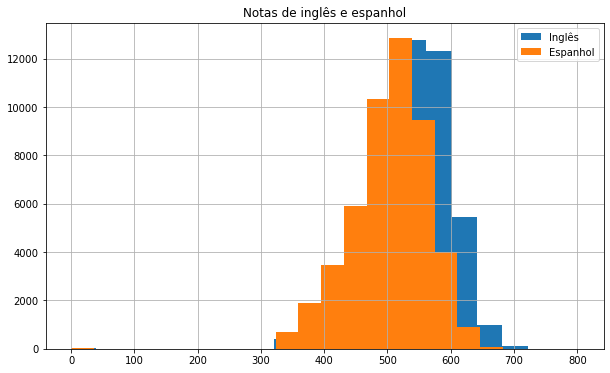

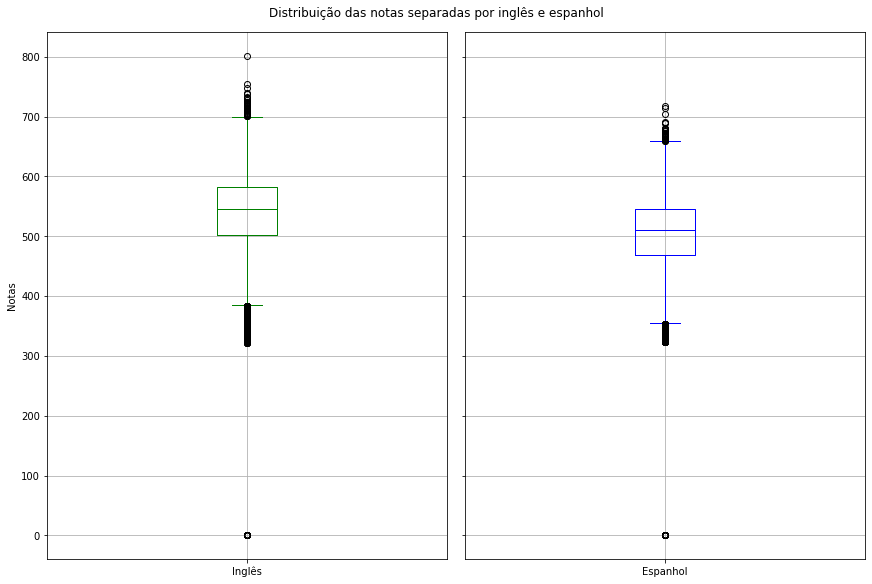

In [ ]:
import matplotlib.pyplot as plt

ingles = dados.query("TP_LINGUA == 0")["NU_NOTA_LC"]
espanhol = dados.query("TP_LINGUA == 1")["NU_NOTA_LC"]

ingles.hist(bins = 20, figsize = (10,6))
espanhol.hist(bins = 20, figsize = (10,6))

plt.legend(["Inglês" , "Espanhol"])
plt.title("Notas de inglês e espanhol")

fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey = True, constrained_layout = True)
fig.suptitle("Distribuição das notas separadas por inglês e espanhol")
ingles.plot.box(ax = axes[0], ylabel = "Notas", label = "Inglês", grid = True, color = "green")
espanhol.plot.box(ax = axes[1], label = "Espanhol", grid = True, color = "blue")

**Desafio 06 - Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações**

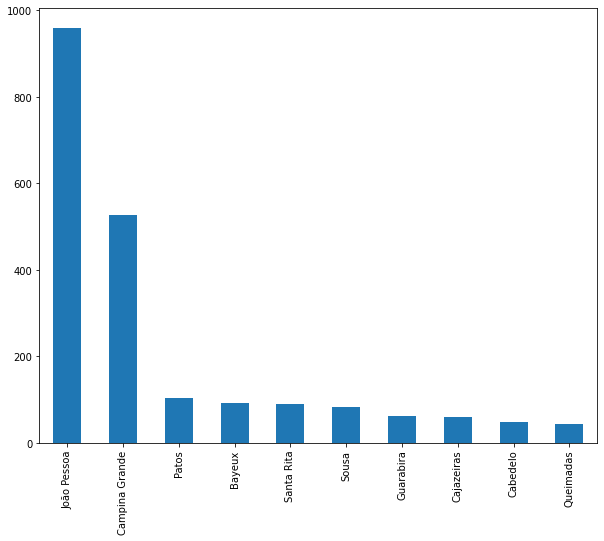

In [ ]:
dados.query("SG_UF_RESIDENCIA == 'PB'")["NO_MUNICIPIO_RESIDENCIA"].value_counts().sort_values(ascending=False)[:10].plot(kind = 'bar', figsize=(10, 8))